#Starting the system

Reference:
https://colab.research.google.com/drive/1xtiBrGeRHmXY3KSOixkZBf_rJIgBImJu?usp=sharing#scrollTo=EMk8HL92ATLL

##Install pygame

In [1]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.3 MB/s eta 0:00:00


##Dependencies

In [2]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
import pygame as pg
import random as rd

pygame 2.1.2 (SDL 2.0.16, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


##Fool system to think it has a video access



In [3]:
# set SDL to use the dummy NULL video driver, 
#   so it doesn't need a windowing system.
os.environ["SDL_VIDEODRIVER"] = "dummy"

##Screen size
Note: Change according to own liking (computer screen)

In [4]:
width = 600
height = 300
screen = pg.display.set_mode((width,height))
pg.init()

(4, 1)

## Function to draw a single bar

In [5]:
def draw_bar(arr, i, color = pg.Color('Cyan')):
    n = len(arr)
    w, h = screen.get_size()
    bar_width = w // n
    bar_height = h // n * arr[i]
    x = bar_width * i
    y = h - bar_height
    bar = pg.Rect(x, y, bar_width, bar_height)
    pg.draw.rect(screen, color, bar)

## Function to visualize an entire array using a bar chart

In [6]:
def draw_bars(arr, sel, cmp, piv):
    screen.fill(pg.Color('Black'))
    if type(sel) == int:
        sel=[sel]
    if type(cmp) == int:
        cmp=[cmp]
    if type(piv) == int:
        piv=[piv]
    for i in range(len(arr)):
        if i in sel:
            draw_bar(arr, i, pg.Color('Red'))
        elif i in cmp:
            draw_bar(arr, i, pg.Color('Orange'))
        elif i in piv:
            draw_bar(arr, i, pg.Color('Green'))
        else:
            draw_bar(arr, i)

##Change period
Note:<br>
Set it to your liking<br>
Recommended value: >300
Value is in milisecods.


In [7]:
CHANGE_PERIOD = 1000

## Display flip using cv2

In [8]:
def display_flip(arr, sel=-1, cmp=-1, piv=-1, time = CHANGE_PERIOD):
    draw_bars(arr, sel, cmp, piv)
    output.clear()
    pg.display.flip()

    #convert image so it can be displayed in OpenCV
    view = pg.surfarray.array3d(screen)

    #  convert from (width, height, channel) to (height, width, channel)
    view = view.transpose([1, 0, 2])

    #  convert from rgb to bgr
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

    # show the image
    cv2_imshow(img_bgr)

    # delay
    pg.time.wait(time)

## Array Size
Note:<br>
Set it to your liking.<br>
Each sort can have different array size.<br>
Unset size will be changed into DEFAULT_ARR_SIZE

In [9]:
DEFAULT_ARR_SIZE = 10

#Useful sort collection visualization

##Bubble Sort

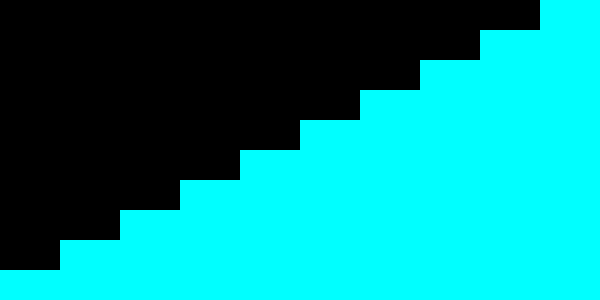

In [10]:
#array size
size = 0
if size <= 0:
    size = DEFAULT_ARR_SIZE
arr = rd.sample(range(1,size+1),size)

# animation loop
for i in range(size):
    for j in range(1,size-i):
        display_flip(arr, j-1, j, size-i)
        if arr[j-1]>arr[j]:
            arr[j-1], arr[j] = arr[j], arr[j-1]
            display_flip(arr, j, j-1, size-i)
        else:
            display_flip(arr, j, -1, size-i)
display_flip(arr)

##Insertion Sort

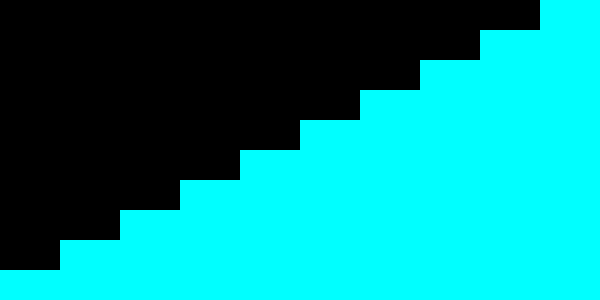

In [11]:
#array size
size = 0
if size <= 0:
    size = DEFAULT_ARR_SIZE

# animation loop
arr = rd.sample(range(1,size+1),size)
for i in range(1,size):
    pick = arr[i]
    for j in range(i,0,-1):
        display_flip(arr, j, j-1, i)
        if pick<arr[j-1]:
            arr[j] = arr[j-1]
            display_flip(arr, j, j-1, i)
        else:
            arr[j] = pick
            display_flip(arr, j, -1, i)
            break
    else:
        arr[0] = pick
        display_flip(arr, 0, -1, i)
display_flip(arr)

###Gnome Sort
A variation of insertion sort.<br>
While it's slower than Insertion Sort in every case,<br>
it's easier to understand the visualization.

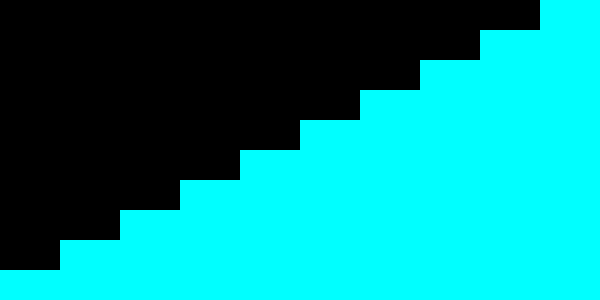

In [12]:
#array size
size = 0
if size <= 0:
    size = DEFAULT_ARR_SIZE
arr = rd.sample(range(1,size+1),size)

# animation loop
for i in range(1,size):
    for j in range(i,0,-1):
        display_flip(arr, j, j-1, i)
        if arr[j]<arr[j-1]:
            arr[j], arr[j-1] = arr[j-1], arr[j]
            display_flip(arr, j-1, j, i)
        else:
            display_flip(arr, j, j, i)
            break
display_flip(arr)

##Selection Sort

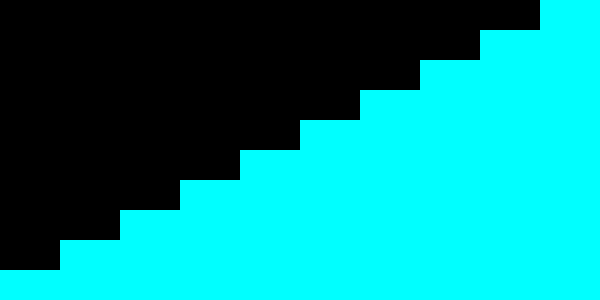

In [13]:
#array size
size = 0
if size <= 0:
    size = DEFAULT_ARR_SIZE

# animation loop
arr = rd.sample(range(1,size+1),size)
for i in range(0,size-1):
    min = i
    for j in range(i+1,size):
        display_flip(arr, min, j, i)
        if arr[min]>arr[j]:
            min = j
            display_flip(arr, min, -1, i)
    else:
        if min != size-1:
            display_flip(arr, min, -1, i)
        arr[i], arr[min] = arr[min], arr[i]
        display_flip(arr, i)
display_flip(arr)

##Quicksort

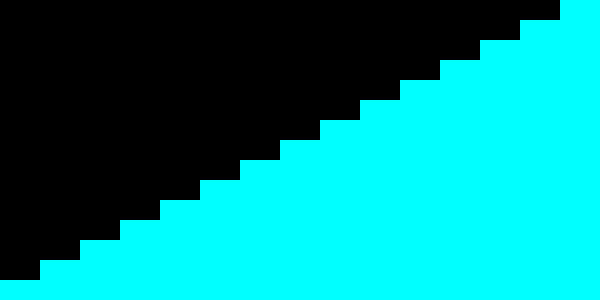

In [16]:
#array size
size = 15
if size <= 0:
    size = DEFAULT_ARR_SIZE
arr = rd.sample(range(1,size+1),size)

#quicksort function
def quicksort(l, r):
    if l>=r:
        return
    pivot = arr[l]
    i = l+1
    j = r
    count = 25
    while i<=j and count>0:
        display_flip(arr,i,j,l)
        while j>=l+1 and arr[j]>=pivot:
            j-=1
            if j>l+1:
                display_flip(arr,i,j,l)
        display_flip(arr,j,i,l)
        while i<=r and arr[i]<=pivot:
            i+=1
            if i<r:
                display_flip(arr,j,i,l)
        if i<j:
            display_flip(arr,[i,j],-1,l)
            arr[i], arr[j] = arr[j], arr[i]
            display_flip(arr,[i,j],-1,l)
    display_flip(arr,[l,j])
    if l != j:
      arr[l], arr[j] = arr[j], arr[l]
      display_flip(arr,[l,j])
    quicksort(l, j-1)
    quicksort(j+1, r)
    
# animation loop
quicksort(0,len(arr)-1)
display_flip(arr)